# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are the most effective drugs as they had the lowest numbers accross all summary results including Average Tumor Volume and Tumor Volume Variance.

- The top 4 drug regimens stayed consistent overall with their results as only one outlier occured accross all 4 regimens. 

- Capomulin showed a high correlation between weight and tumor volume.

- Additional comparisons should be done using the sex as a measurement to determine if sex has any bearing on results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count = len(pd.unique(mouse_df['Mouse ID']))
mice_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = mouse_df[mouse_df.duplicated()]
duplicate['Mouse ID'].values

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_id = duplicate['Mouse ID'].values
duplicate_data = mouse_df[mouse_df['Mouse ID'].isin(mouse_id)]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = mouse_df[~mouse_df['Mouse ID'].isin(mouse_id)]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
new_count = len(pd.unique(clean_data['Mouse ID']))
new_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_summary = clean_data.groupby(['Drug Regimen'])
mean_tumor = drug_summary['Tumor Volume (mm3)'].mean()
median_tumor = drug_summary['Tumor Volume (mm3)'].median()
tumor_var = drug_summary['Tumor Volume (mm3)'].var()
tumor_stdv = drug_summary['Tumor Volume (mm3)'].std()
tumor_stderr = drug_summary['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_sum_df = pd.DataFrame({'Mean Tumor Volume':mean_tumor, 'Median Tumor Volume':median_tumor, 'Tumor Volume Variance':tumor_var,
                            'Tumor Volume Std. Dev.':tumor_stdv, 'Tumor Volume Std. Err.':tumor_stderr})
drug_sum_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
agg_summary = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean','median','var','std','sem'])
agg_summary


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

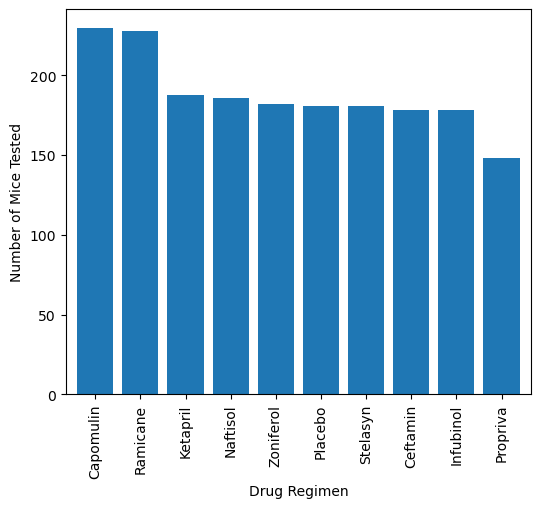

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
chart_info = drug_summary[['Timepoint']].count()
chart_sorted = chart_info['Timepoint'].sort_values(ascending=False)
chart_sorted.plot(kind="bar", width=.8, ylabel='Number of Mice Tested', figsize=(6,5))
plt.show()


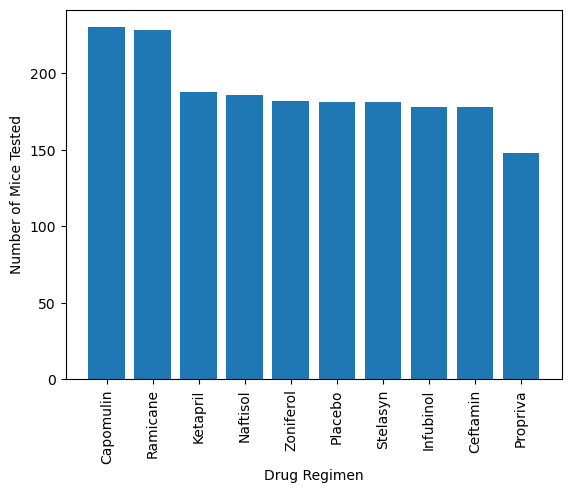

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = clean_data['Drug Regimen'].value_counts()
x_axis = list(drugs.index)

plt.bar(x_axis, drugs)
plt.xticks(x_axis, rotation="vertical")
plt.ylabel('Number of Mice Tested')
plt.xlabel('Drug Regimen')
plt.show()


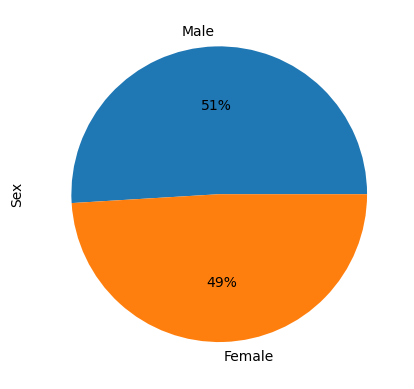

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sexes = clean_data['Sex'].value_counts()
sexes.plot(kind="pie", autopct='%1.0f%%')
plt.show()

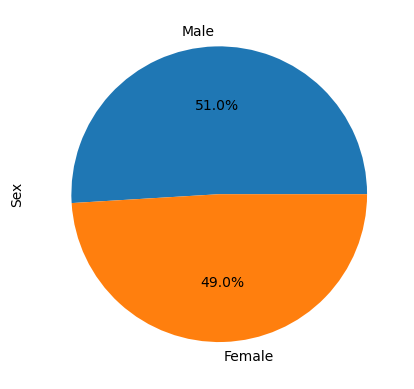

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sexes_df = clean_data['Sex'].value_counts()
labels = list(sexes_df.index)
plt.ylabel('Sex')
plt.pie(sexes_df, labels=labels, autopct="%0.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = clean_data.groupby(['Mouse ID'])
max_timepoint = mouse_group['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge = pd.merge(clean_data, max_timepoint, on=["Mouse ID","Timepoint"])

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
            
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for value in treatments:
    drug_filter = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == value, 'Tumor Volume (mm3)']
    reduced = timepoint_merge.loc[timepoint_merge["Drug Regimen"] == value, :]
    tumor_vol.append(drug_filter)
    
    # add subset 
    quartiles = reduced['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = reduced.loc[(reduced['Tumor Volume (mm3)'] < lower_bound) | (reduced['Tumor Volume (mm3)'] > upper_bound)]
    
    # Determine outliers using upper and lower bounds
    print(f"{value}'s potential outliers: {outlier['Tumor Volume (mm3)']}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


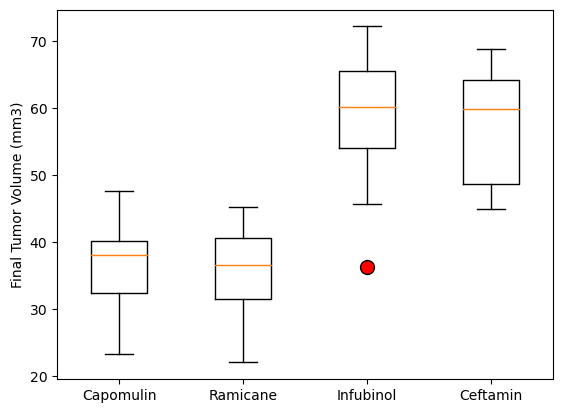

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

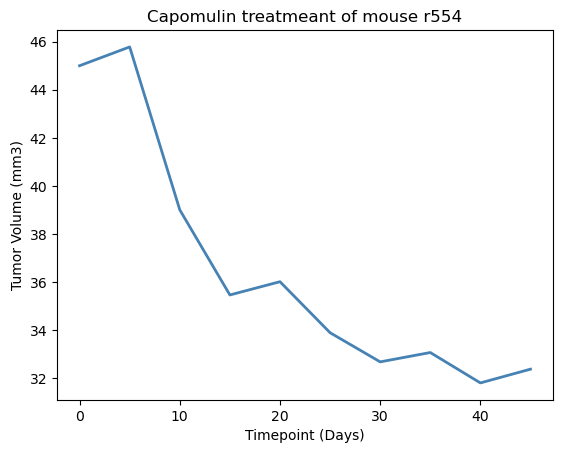

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = clean_data.loc[clean_data['Drug Regimen'] == "Capomulin", :]
sample_mouse = list(capomulin_df["Mouse ID"].sample())
mouse_df = capomulin_df[capomulin_df["Mouse ID"].isin(sample_mouse)]
x=str(sample_mouse)
x=x.replace("['","")
x=x.replace("']","")
x_axis = mouse_df["Timepoint"]
tumor = mouse_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(x_axis, tumor,linewidth=2, markersize=15,color="steelblue", label="Fahreneit")
plt.title(f'Capomulin treatmeant of mouse {x}')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

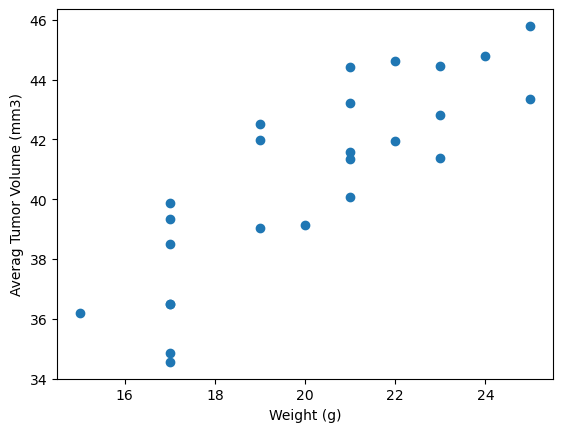

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
capomulin_avg_vol = capomulin_df.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_avg_vol['Weight (g)'],capomulin_avg_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Averag Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


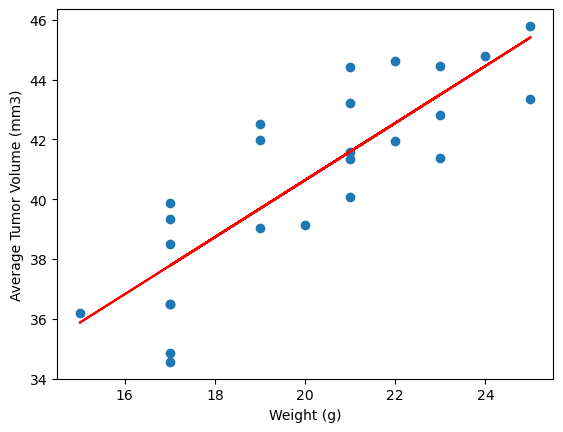

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_avg_vol['Weight (g)'],capomulin_avg_vol['Tumor Volume (mm3)'])
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

corr_x = capomulin_avg_vol["Weight (g)"]
corr_y = capomulin_avg_vol["Tumor Volume (mm3)"]

(slope, intercept,rvalue, pvalue, stderr)=st.linregress(corr_x,corr_y)
regress_values=corr_x* slope + intercept
plt.scatter(corr_x,corr_y)
plt.plot(corr_x, regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()
